# **Лабораторная работа №5. Обучение с подкреплением**

### Выполнил: Веснин М.А.
### Проверил: Ведяков А.А.

The lab tasks

0. Q-table
1. Implement simple DQN to solve the problem
  - the solution must have some positive dynamic in terms of the number of successful episodes and steps in episodes. However, the problem can not be completely solved
2. Add experience replay
  - the problem must be solved completely: for the 300 episodes during test the return for each episode must be equal to 200
3. Add target network
  - the problem must be solved completely: for the 300 episodes during test the return for each episode must be equal to 200
4. Implement on-policy method

Soft deadline 27.06
Hard deadline 29.06

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
from pyvirtualdisplay import Display
d = Display(visible=0, size=(400, 300))
d.start()

def show_state(env, episode=0, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Eposide: %d | Step: %d %s" % ('Cart-pole-v0', episode, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [ ]:
import numpy as np

def get_state(observation, n_buckets, state_bounds):
    state = [0] * len(observation)
    for i, s in enumerate(observation):
        l, u = state_bounds[i][0], state_bounds[i][1]
        if s <= l:
            state[i] = 0
        elif s >= u:
            state[i] = n_buckets[i] - 1
        else:
            relS = s - l
            size = u - l
            state[i] = int(relS/size*n_buckets[i])

    return tuple(state)

def choose_action(state, q_table, action_space, epsilon):
    if np.random.random_sample() < epsilon:
        return action_space.sample()
    else:
        return np.argmax(q_table[state])

In [ ]:
import gym, math

env = gym.make('CartPole-v0')

# Q table
n_buckets = (1, 1, 4, 3)
n_actions = env.action_space.n # Actions

## States
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-99, 99]
state_bounds[2] = [-math.radians(16), math.radians(16)]
state_bounds[3] = [-math.radians(50), math.radians(50)]

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Q-таблица для машинки с маятником

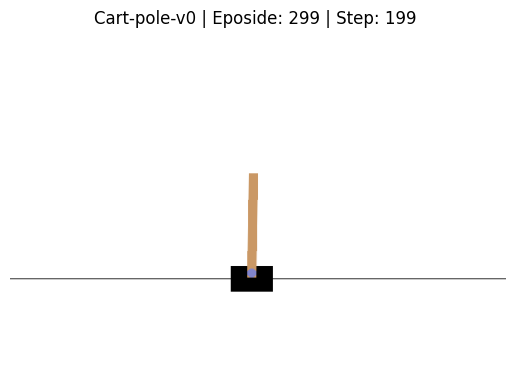

done


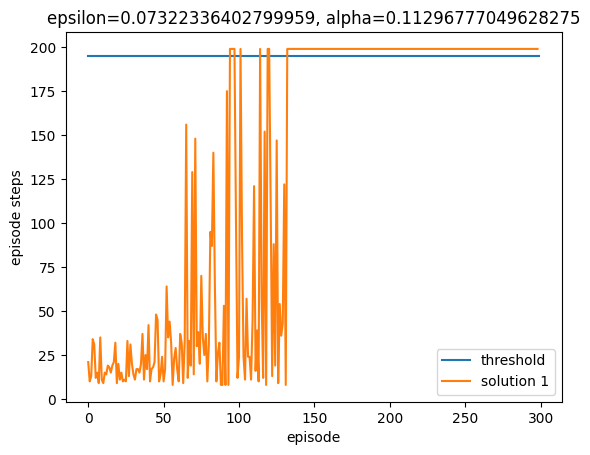

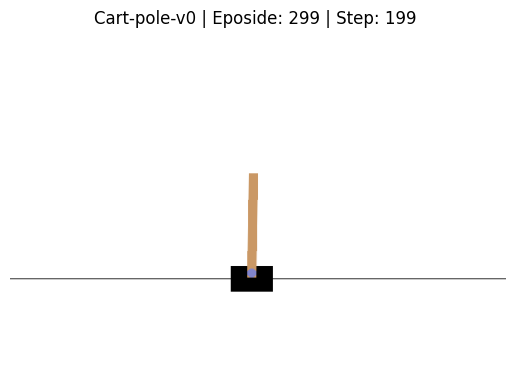

In [ ]:
## Q-table – table of state-action pair
q_table = np.zeros(n_buckets + (n_actions,))

# Learning Parameters
epsilon = 1 # gready threashold
alpha = 0.5 # learning rate
gamma = 0.99 # reward discount factor

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 300
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_steps_number = np.zeros(EPISODES_MAX)
log_max_pose = np.zeros(EPISODES_MAX)
log_max_angle = np.zeros(EPISODES_MAX)
log_max_angle_vel = np.zeros(EPISODES_MAX)

# Q-learning
for i_episode in range(EPISODES_MAX):

    observation = env.reset()
    state = get_state(observation, n_buckets, state_bounds)

    if (i_episode + 1) % 10 == 0:
        plt.figure(1)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode steps')
        plt.legend()
        plt.title('epsilon={}, alpha={}'.format(epsilon, alpha))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    if (i_episode + 1) % 8 == 0:
        if epsilon > 0.2:
            epsilon = epsilon*0.9
        elif epsilon > 0.1:
            epsilon = epsilon*0.95
        elif epsilon > 0.05:
            epsilon = epsilon*0.99
        else:
            epsilon = 0.01

    if (i_episode + 1) % 25 == 0 and i_episode > 100:
        epsilon = epsilon*0.95

    if (i_episode + 1) % 10 == 0 and i_episode > 0:
        alpha = alpha*0.95

    for t in range(STEPS_MAX):
        # env.render()
        if SHOW_ANIMATION or (i_episode > 0.99*EPISODES_MAX and t > 0.99*DESIRED_STEPS):
            show_state(env.env, i_episode, t)

        action = choose_action(state, q_table, env.action_space, epsilon)
        observation, reward, done, info = env.step(action)
        log_max_pose[i_episode] = max(log_max_pose[i_episode], abs(observation[0]))
        log_max_angle[i_episode] = max(log_max_angle[i_episode], abs(observation[2]))
        log_max_angle_vel[i_episode] = max(log_max_angle_vel[i_episode], abs(observation[3]))

        next_state = get_state(observation, n_buckets, state_bounds)

        # Update Q table
        q_next_max = np.amax(q_table[next_state])
        q_table[state + (action,)] += alpha*(reward + gamma*q_next_max - q_table[state + (action,)])

        # Update current state
        state = next_state

        if done:
            log_steps_number[i_episode] = t;
            break

print("done")

График положения тележки

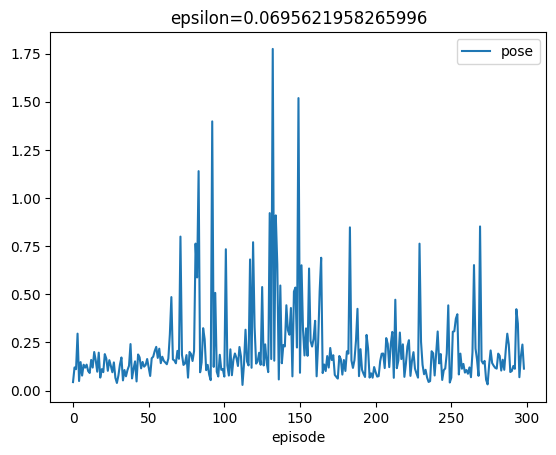

In [ ]:
plt.figure(2)
plt.clf()
plt.plot(range(0,i_episode), log_max_pose[0:i_episode], label="pose")
plt.xlabel('episode')
plt.legend()
plt.title('epsilon={}'.format(epsilon))
display.clear_output(wait=True)

График угла наклона маятника

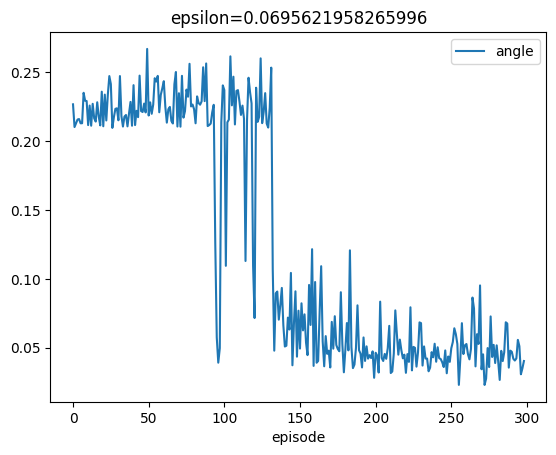

In [ ]:
plt.figure(2)
plt.clf()
plt.plot(range(0,i_episode), log_max_angle[0:i_episode], label="angle")
plt.xlabel('episode')
plt.legend()
plt.title('epsilon={}'.format(epsilon))
display.clear_output(wait=True)

График угловой скорости

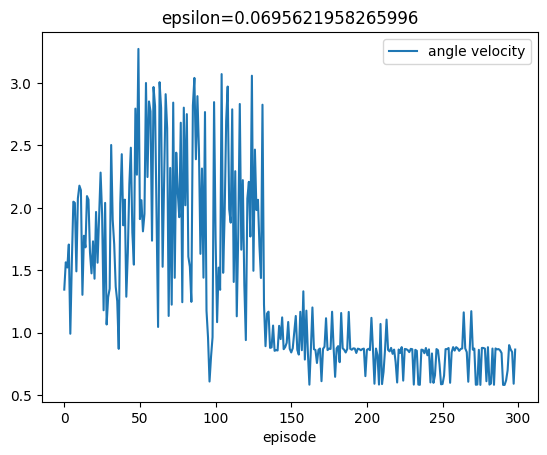

In [ ]:
plt.clf()
plt.plot(range(0,i_episode), log_max_angle_vel[0:i_episode], label="angle velocity")
plt.xlabel('episode')
plt.legend()
plt.title('epsilon={}'.format(epsilon))
display.clear_output(wait=True)

### Проверка Q-таблицы. Среднее значение должно быть выше 200

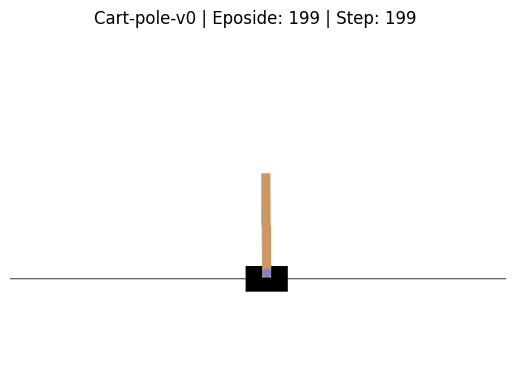

done


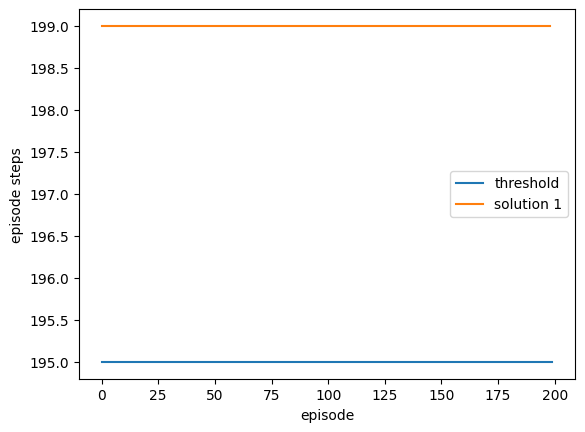

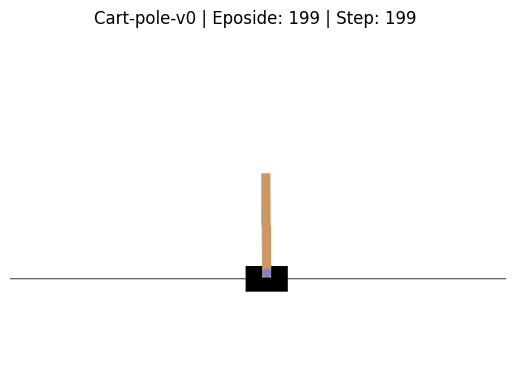

In [ ]:
# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 200
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_steps_number = np.zeros(EPISODES_MAX)

# Q-learning
for i_episode in range(EPISODES_MAX):

    observation = env.reset()
    state = get_state(observation, n_buckets, state_bounds)

    if (i_episode + 1) % 10 == 0:
        plt.figure(1)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode steps')
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        # env.render()
        if SHOW_ANIMATION or (i_episode > 0.99*EPISODES_MAX and t > 0.99*DESIRED_STEPS):
            show_state(env.env, i_episode, t)

        action = np.argmax(q_table[state])
        observation, reward, done, info = env.step(action)
        next_state = get_state(observation, n_buckets, state_bounds)

        # Update current state
        state = next_state

        if done:
            log_steps_number[i_episode] = t;
            break

print("done")

In [ ]:
import copy
import torch
from torch.autograd import Variable
import random
import math
import torchvision.transforms as T
import numpy as np
import time
import matplotlib.pyplot as plt

!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

from IPython import display
from pyvirtualdisplay import Display
d = Display(visible=0, size=(400, 300))
d.start()

def show_state(env, episode=0, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Eposide: %d | Step: %d %s" % ('Cart-pole-v0', episode, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

## DQN + replay

In [ ]:
class DQN():
    ''' Deep Q Neural Network class. '''
    def __init__(self, state_dim, action_dim, hidden_dim=12, alpha=0.001):
            self.criterion = torch.nn.MSELoss()
            self.model = torch.nn.Sequential(
                torch.nn.Linear(state_dim, hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(hidden_dim, 2*hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(2*hidden_dim, action_dim)
            )
            self.optimizer = torch.optim.Adam(self.model.parameters(), alpha)

            self.losses = []
            self.memory = []


    def update(self, state, y):
        """Update the weights of the network given a training sample. """
        y_pred = self.model(torch.Tensor(state))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))

        self.losses.append(loss.detach().numpy())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def predict(self, state):
        """ Compute Q values for all actions using the DQL. """
        with torch.no_grad():
            return self.model(torch.Tensor(state))

    def replay(self, size, gamma):
        if len(self.memory) < size:
            return

        batch = random.sample(self.memory, size)

        batch_t = list(map(list, zip(*batch)))
        states = torch.Tensor(batch_t[0])
        actions = torch.LongTensor(batch_t[1])
        next_states = torch.Tensor(batch_t[2])
        rewards = torch.Tensor(batch_t[3])
        dones = torch.BoolTensor(batch_t[4])

        dones_indices = torch.where(dones==True)[0]

        all_q_values = model.predict(states)
        all_q_values_next = model.predict(next_states)


        all_q_values[range(len(all_q_values)), actions] = rewards + gamma*torch.max(all_q_values_next, axis=1).values
        all_q_values[dones_indices.tolist(), actions[dones].tolist()] = rewards[dones_indices.tolist()]

        self.update(states.tolist(), all_q_values.tolist())

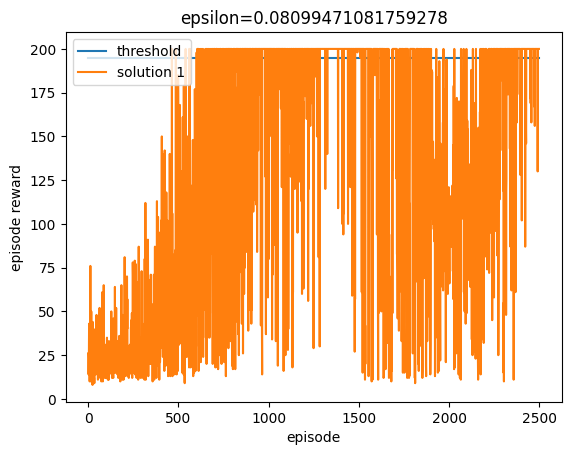

done


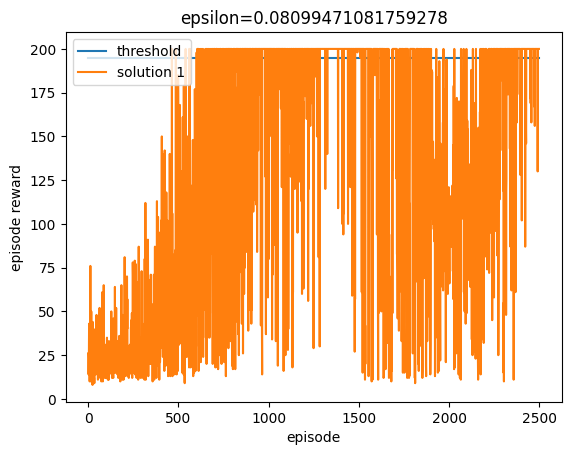

In [ ]:
import gym, math
import numpy as np

env = gym.make('CartPole-v0')

# Q table
n_states = 4
n_actions = env.action_space.n # Actions

n_hidden = 12
alpha = 0.001
model = DQN(n_states, n_actions, n_hidden, alpha)

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 2500
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)

# Learning Parameters
epsilon = 1 # gready threashold
alpha_2 = 0.0003 # learning rate
gamma = 0.99 # reward discount factor
replay_size = 60

model.optimizer = torch.optim.Adam(params=model.model.parameters(), lr=alpha_2)

# Q-learning
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0 and epsilon > 0.01:
        epsilon = epsilon*0.95

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epsilon={}'.format(epsilon))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        q_values = model.predict(state)

        if np.random.random_sample() < epsilon:
            action = env.action_space.sample()
        else:
          action = torch.argmax(q_values).item()

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation
        model.memory.append((state, action, next_state, reward, done))

        q_values_list = q_values.tolist()

        if done:
            log_total_reward[i_episode] = rewards
            log_steps_number[i_episode] = t

            if len(model.memory) < replay_size:
                q_values_list[action] = reward
                model.update(state, q_values_list)
            else:
                model.replay(replay_size, gamma)
            break

        # Update Q-network
        if len(model.memory) < replay_size:
            q_values_next = model.predict(next_state)
            q_values_list[action] = reward + gamma * torch.max(q_values_next).item()
            model.update(state, q_values_list)
        else:
            model.replay(replay_size, gamma)
        # Update current state
        state = next_state

print("done")

### Проверка DQN + replay. На 300 эпохах значение должно быть выше 200

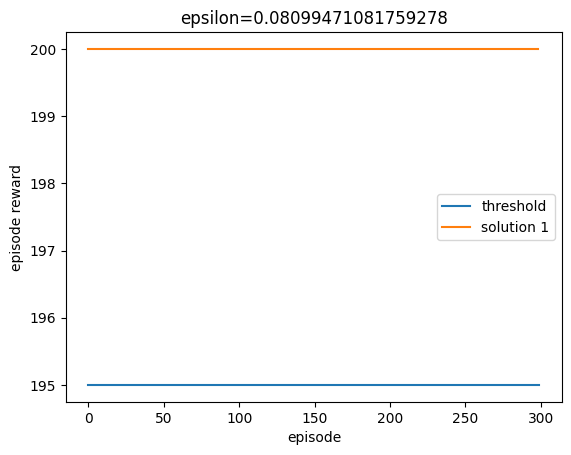

done


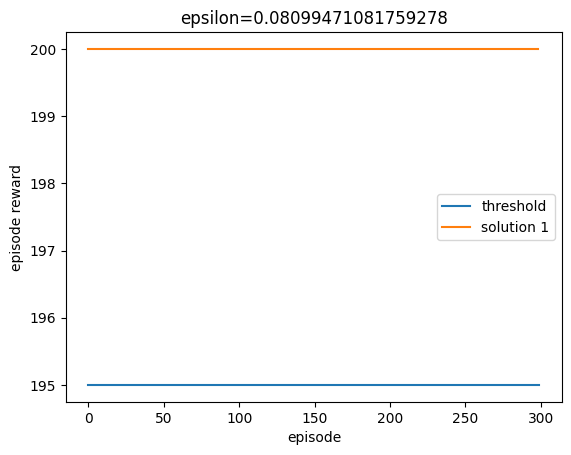

In [ ]:
for i_episode in range(300):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epsilon={}'.format(epsilon))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        q_values = model.predict(state)

        action = torch.argmax(q_values).item()

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation
        model.memory.append((state, action, next_state, reward, done))

        if done:
            log_total_reward[i_episode] = rewards
            log_steps_number[i_episode] = t
            break
        state = next_state

print("done")

## DQN + target

In [ ]:
class DQN_t():
    ''' Deep Q Neural Network class. '''
    def __init__(self, state_dim, action_dim, hidden_dim=12, alpha=0.001):
            self.criterion = torch.nn.MSELoss()
            self.model = torch.nn.Sequential(
                torch.nn.Linear(state_dim, hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(hidden_dim, 2*hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(2*hidden_dim, action_dim)
            )
            self.optimizer = torch.optim.Adam(self.model.parameters(), alpha)

            self.losses = []
            self.memory = []


    def update(self, state, y):
        """Update the weights of the network given a training sample. """
        y_pred = self.model(torch.Tensor(state))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))

        self.losses.append(loss.detach().numpy())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def predict(self, state):
        """ Compute Q values for all actions using the DQL. """
        with torch.no_grad():
            return self.model(torch.Tensor(state))

    def replay(self, tmodel, size, gamma):
        if len(self.memory) < size:
            return

        batch = random.sample(self.memory, size)

        batch_t = list(map(list, zip(*batch)))
        states = torch.Tensor(batch_t[0])
        actions = torch.LongTensor(batch_t[1])
        next_states = torch.Tensor(batch_t[2])
        rewards = torch.Tensor(batch_t[3])
        dones = torch.BoolTensor(batch_t[4])

        dones_indices = torch.where(dones==True)[0]

        all_q_values = tmodel.predict(states)
        all_q_values_next = tmodel.predict(next_states)


        all_q_values[range(len(all_q_values)), actions] = rewards + gamma*torch.max(all_q_values_next, axis=1).values
        all_q_values[dones_indices.tolist(), actions[dones].tolist()] = rewards[dones_indices.tolist()]

        self.update(states.tolist(), all_q_values.tolist())

In [ ]:
import copy
class DQN_target():
  def __init__(self, model_dqn):
    self.model = copy.deepcopy(model_dqn.model)
    self.model_dqn = model_dqn

  def update(self):
    parameters = self.model_dqn.model.state_dict()
    self.model.load_state_dict(parameters)

  def predict(self, state):
    with torch.no_grad():
            return self.model(torch.Tensor(state))

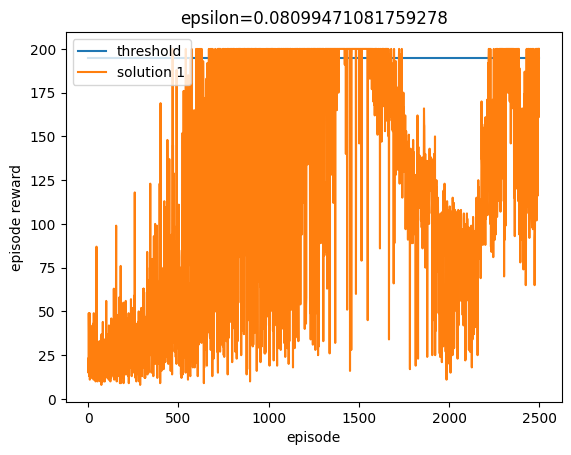

done


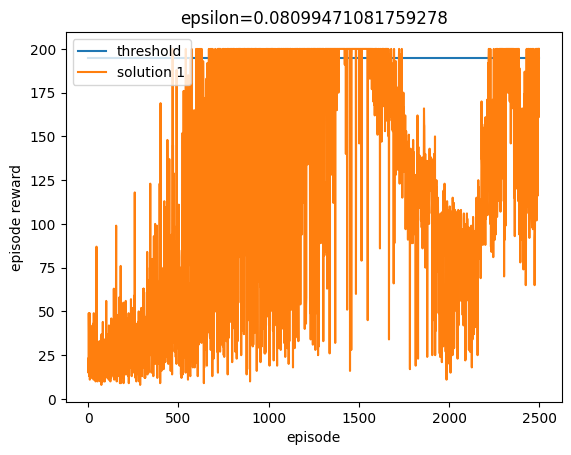

In [ ]:
import gym, math
import numpy as np

env = gym.make('CartPole-v0')

# Q table
n_states = 4
n_actions = env.action_space.n # Actions

n_hidden = 12
alpha = 0.001
model_target = DQN_t(n_states, n_actions, n_hidden, alpha)
tmodel = DQN_target(model_target)

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 2500
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)

# Learning Parameters
epsilon = 1 # gready threashold
alpha_2 = 0.0003 # learning rate
gamma = 0.99 # reward discount factor
replay_size = 60

model_target.optimizer = torch.optim.Adam(params=model_target.model.parameters(), lr=alpha_2)

# Q-learning
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0 and epsilon > 0.01:
        epsilon = epsilon*0.95

    if (i_episode + 1) % 10 == 0:
        tmodel.update()

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epsilon={}'.format(epsilon))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        q_values = model_target.predict(state)

        if np.random.random_sample() < epsilon:
            action = env.action_space.sample()
        else:
          action = torch.argmax(q_values).item()

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation
        model_target.memory.append((state, action, next_state, reward, done))

        q_values_list = q_values.tolist()

        if done:
            log_total_reward[i_episode] = rewards
            log_steps_number[i_episode] = t

            if len(model_target.memory) < replay_size:
                q_values_list[action] = reward
                model_target.update(state, q_values_list)
            else:
                model_target.replay(tmodel, replay_size, gamma)
            break

        # Update Q-network
        if len(model_target.memory) < replay_size:
            q_values_next = model_target.predict(next_state)
            q_values_list[action] = reward + gamma * torch.max(q_values_next).item()
            model_target.update(state, q_values_list)
        else:
            model_target.replay(tmodel, replay_size, gamma)
        # Update current state
        state = next_state

print("done")

### Проверка DQN + replay + target. На 300 эпохах значение должно быть выше 200

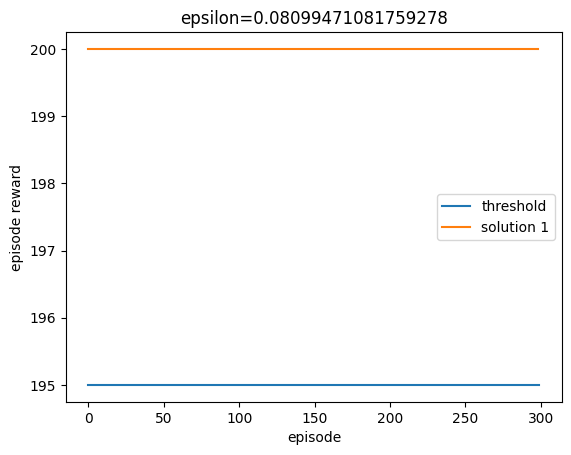

done


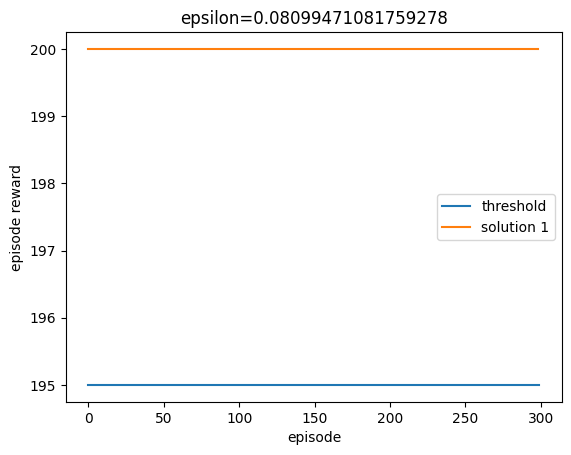

In [ ]:
for i_episode in range(300):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epsilon={}'.format(epsilon))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        q_values = model_target.predict(state)

        action = torch.argmax(q_values).item()

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation
        model_target.memory.append((state, action, next_state, reward, done))

        if done:
            log_total_reward[i_episode] = rewards
            log_steps_number[i_episode] = t
            break
        state = next_state

print("done")

## On-policy method

In [ ]:
from torch import distributions

class PG():
    def __init__(self, state_dim, action_dim, hidden_dim=12, alpha=0.001):
            self.model = torch.nn.Sequential(
                torch.nn.Linear(state_dim, hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(hidden_dim, 2*hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(2*hidden_dim, action_dim)
            )
            self.optimizer = torch.optim.Adam(self.model.parameters(), alpha)

    def get_policy(self, state):
        logits = self.model(torch.Tensor(state))
        return distributions.Categorical(logits=logits)

    def get_action(self, state):
        policy = self.get_policy(state)
        return policy.sample().item()

    def update(self, states, actions, weights):
        self.optimizer.zero_grad()

        actions = torch.Tensor(actions)
        weights = torch.Tensor(weights)

        policy = self.get_policy(states)

        loss = -(policy.log_prob(actions) * weights).mean()

        loss.backward()
        self.optimizer.step()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


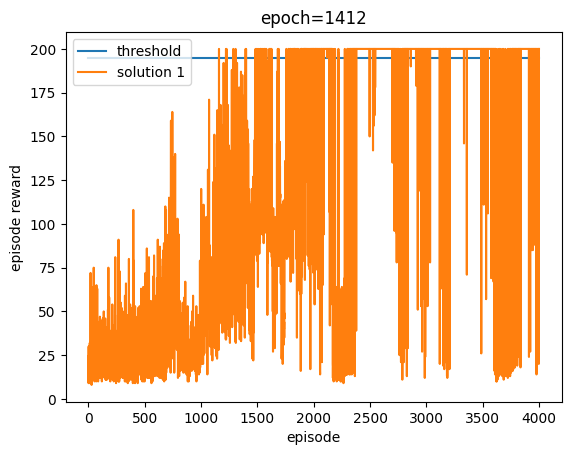

done


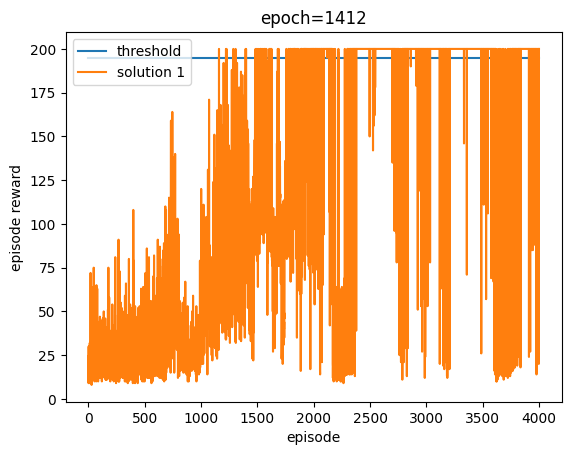

In [ ]:
alpha = 0.005
gamma = 0.99
n_states = 4
n_actions = env.action_space.n # Actions

batch_size = 200

model_pg = PG(n_states, n_actions, 12, alpha)

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 4000
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)


batch_states = []
batch_actions = []
batch_weights = []

episode_rewards = []
epoch = 0

# Q-learning
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epoch={}'.format(epoch))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model_pg.get_action(state)
        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        batch_states.append(state)
        batch_actions.append(action)
        episode_rewards.append(reward)

        q_values_list = q_values.tolist()

        if done:
            episode_lenght = t + 1
            batch_weights += [rewards] * episode_lenght


            log_total_reward[i_episode] = episode_lenght
            log_steps_number[i_episode] = rewards

            break
        # Update current state
        state = next_state

    if len(batch_actions) > batch_size:

        epoch += 1

        model_pg.update(batch_states, batch_actions, batch_weights)

        batch_states = []
        batch_actions = []
        batch_weights = []
        episode_rewards = []

print("done")

### Проверка On policy. На 300 эпохах значение должно быть выше 200

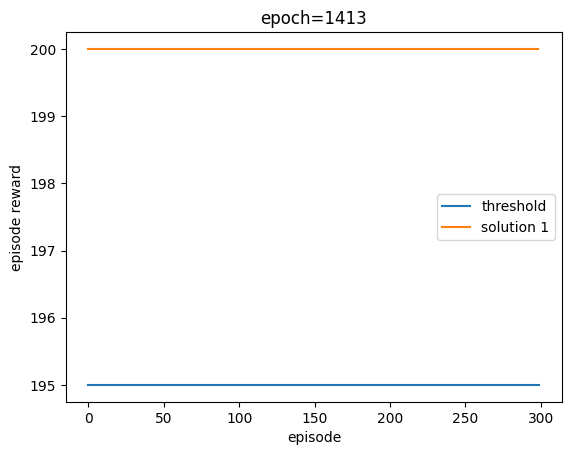

done


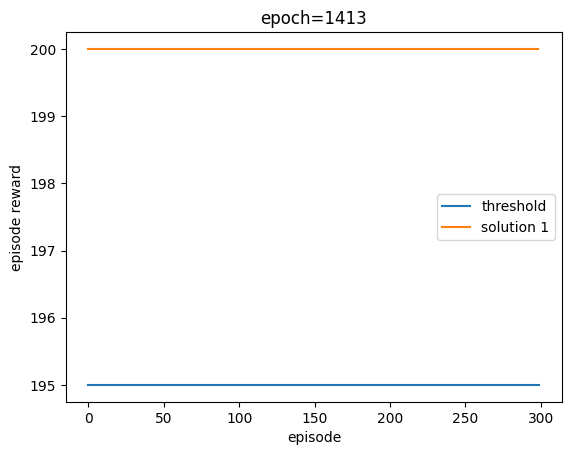

In [ ]:
# Q-learning
for i_episode in range(300):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epoch={}'.format(epoch))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model_pg.get_action(state)
        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        if done:
            log_total_reward[i_episode] = episode_lenght
            log_steps_number[i_episode] = rewards

            break
        # Update current state
        state = next_state

print("done")

## Цель достигнута, но пришлось обучать аж 4000 эпох. Применим reward-to-go

In [ ]:
def reward_to_go(rews):
  n = len(rews)
  rtgs = np.zeros_like(rews)
  for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
  return list(rtgs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


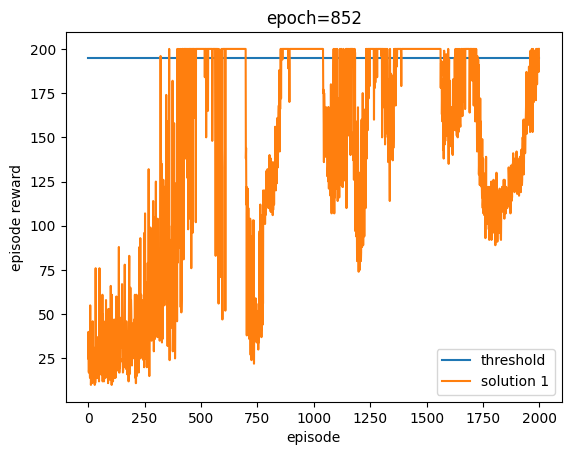

done


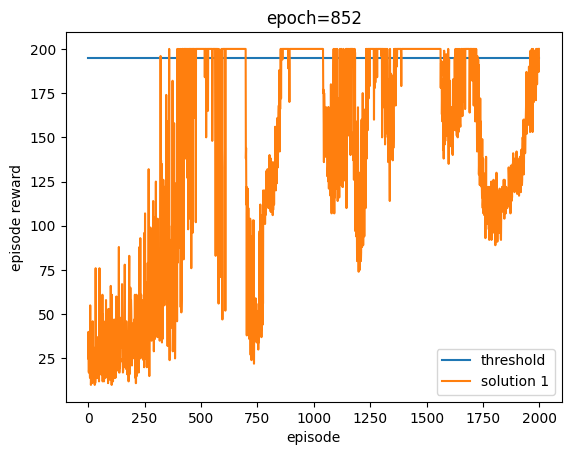

In [ ]:
alpha = 0.005
gamma = 0.99
n_states = 4
n_actions = env.action_space.n # Actions

batch_size = 200

model_pg2 = PG(n_states, n_actions, 12, alpha)

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 2000
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)


batch_states = []
batch_actions = []
batch_weights = []

episode_rewards = []
epoch = 0

# Q-learning
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation
    episode_rewards = []

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epoch={}'.format(epoch))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model_pg2.get_action(state)
        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        batch_states.append(state)
        batch_actions.append(action)
        episode_rewards.append(reward)

        q_values_list = q_values.tolist()

        if done:
            episode_lenght = t + 1
            batch_weights += reward_to_go(episode_rewards)


            log_total_reward[i_episode] = episode_lenght
            log_steps_number[i_episode] = rewards

            break
        # Update current state
        state = next_state

    if len(batch_actions) > batch_size:

        epoch += 1

        model_pg2.update(batch_states, batch_actions, batch_weights)

        batch_states = []
        batch_actions = []
        batch_weights = []
        episode_rewards = []

print("done")

### Проверка On policy c reward-to-go. На 300 эпохах значение должно быть выше 200

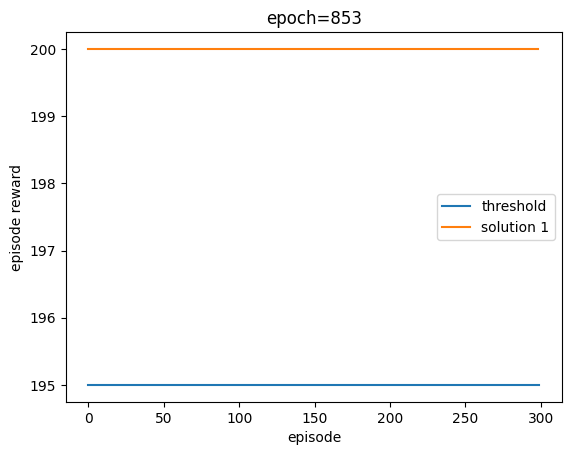

done


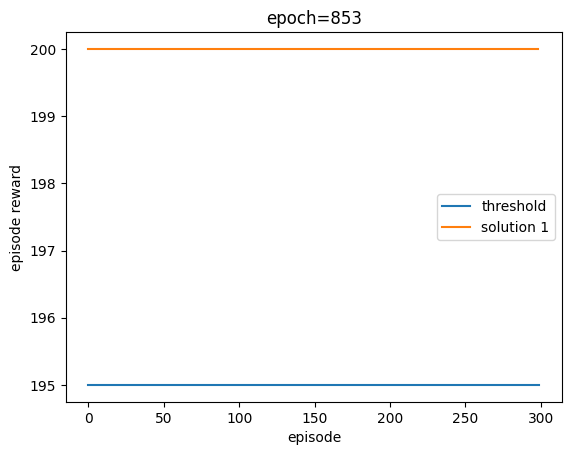

In [ ]:
# Q-learning
for i_episode in range(300):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 100 == 0:

        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_total_reward[0:i_episode], label="solution 1")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title('epoch={}'.format(epoch))
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model_pg2.get_action(state)
        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        if done:
            log_total_reward[i_episode] = episode_lenght
            log_steps_number[i_episode] = rewards

            break
        # Update current state
        state = next_state

print("done")

## **Выводы по работе**
В ходе выполнения лабораторной работы были рассмотрены и выполнены алгоритмы обучения с подкреплением:
+ Для машинки с маятником с помощью Q-таблицы была обеспечена желаемая средняя награда больше 192 в 200 эпизодах;
+ Далее был успешно реализован DQN алгоритм c модификацией в виде "replay", что также позволило за 2500 эпох обеспечить награду в 300 эпизодах в 200
+ Далее к DQN с replay была добавлена target-network, и также был поставленный результат. Была попытка уменьшить число эпох до 1500, однако это не позволило обеспечить необходимый результат
+ Был реализован On-policy метод. Пришлось обучать целых 4000 эпох, чтобы обеспечить награду в 200. Чтобы уменьшить количество эпох обучения был применён reward-to-go метод, который позволил уменьшить количество эпох обучения до 2000.